# Reinforcement Learning on S-RCPSPs
This approach uses the Forward Sarsa (λ) algorithm and Adam stochastic gradient descent.

In [14]:
from thesis.Project import *
from ForwardSarsaLambda import *

import random

import tensorflow as tf
import keras as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import logging
import importlib

importlib.reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

ModuleNotFoundError: No module named 'thesis'

In [ ]:
model_name='256-256-uni2-30'
keep_prob = 0.8

In [ ]:
class Model:
    def __init__(self, num_of_inputs, activation='relu'):

        self.model = model = Sequential()
        model.add(Dense(256, kernel_initializer='he_normal', activation=activation, input_shape=(num_of_inputs, )))
        model.add(Dropout(rate=1-keep_prob))
        #model.add(Dense(64, kernel_initializer='he_normal', activation=activation))
        #model.add(Dropout(0.2))
        model.add(Dense(256, kernel_initializer='he_normal', activation=activation))
        model.add(Dropout(rate=1-keep_prob))
        model.add(Dense(1, kernel_initializer='he_normal', activation='linear'))

        model.compile(loss='mean_squared_error', optimizer='adam')

        self.tensorboard = TensorBoard(log_dir="D:/Gregor/Studium/Master 04 - WS 18-19/logs/" + model_name, write_graph=False, update_freq=100)

In [ ]:
m = Model(1266)

In [ ]:
m.model.summary()

In [ ]:
fsl.train()

# PPO Algorithmus

In [ ]:
class PPO:
    def __init__(self, episodes, num_of_inputs, actor_learning_rate=0.001, critic_learning_rate=0.001,
                 gamma=0.95, epsilon_clip=0.2, activation='relu'):
        """
        """
        self.episodes = episodes
        self.actor_learning_rate = actor_learning_rate
        self.critic_learning_rate = critic_learning_rate
        self.gamma = gamma
        self.epsilon_clip = epsilon_clip
        self.activation = activation
        self.num_of_inputs = num_of_inputs

        self.base_model = self.build_base_model(num_of_inputs, activation)
        self.critic = self.build_critic(num_of_outputs)
        self.actor = self.build_actor(num_of_inputs)

    def ppo_loss(self, pred, pred_old):
        """L^(CLIP+VF+S) clipped loss function L^CLIP with added value function error
           term VF as well as an entropy bonus S
        """
        pass

    def build_base_model(self):
        """Builds the model base without actor or critic head.
        
        :param num_of_inputs: number of inputs
        :param activaton: the activation function
        """
        model = Sequential()
        model.add(Dense(64, kernel_initializer='he_normal', activation=activation, input_shape=(num_of_inputs, )))
        model.add(Dropout(0.2))
        model.add(Dense(64, kernel_initializer='he_normal', activation=activation))
        model.add(Dropout(0.2))
        model.add(Dense(64, kernel_initializer='he_normal', activation=activation))
        model.add(Dropout(0.2))
        return model

    def build_actor(self):
        actor = self.base_model
        actor.add(Dense(1, kernel_initializer='he_normal', activation='linear'))
        actor.compile(loss='mean_squared_error', optimizer='adam')
        return actor

    def build_critic(self):
        critic = self.base_model
        critic.add(Dense(num_actions))

In [ ]:
PPO(1, 603).build_actor()

In [ ]:
from Project import *
from ForwardSarsaLambda import *
project.state()

In [108]:
test_projects = [Project(p, stochastic='uniform_2') for p in test]

In [234]:
min_weights = 1
max_weights = 16
num = 32
eva = evaluator(test_projects[14], num)

In [235]:
times = {}
for weights in range(min_weights, max_weights):
    ts = []
    for i in range(20):
        eva.load_weights(weights)
        ts.append(eva.evaluate())
    times[weights] = ts

In [236]:
import matplotlib.pyplot as plt

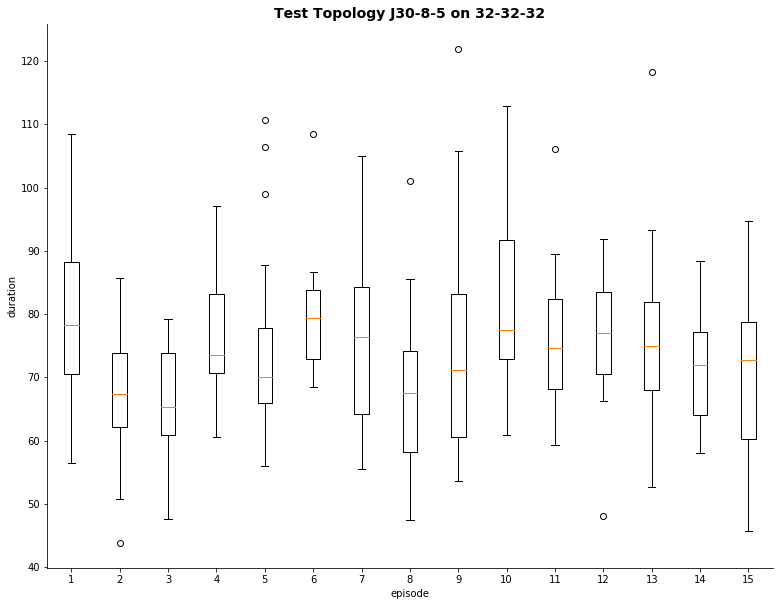

In [237]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
ax.boxplot(times.values(), widths=0.3)

ax.set_title('Test Topology J30-8-5 on {}-{}-{}'.format(num, num, num), fontsize=14, fontweight='bold')
ax.set_xlabel('episode')
ax.set_ylabel('duration')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.show()